# Emotion Recognizer

## Importing libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Bidirectional,Flatten,Embedding
from keras.utils import to_categorical

## Loading data

In [3]:
train_data = open(r"train.txt").readlines()
texts = []
labels = []

for i in train_data:
    j = i.split(";")
    texts.append(j[0])
    labels.append(j[1].rstrip("\n"))

## Encoding the labels

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
labels = encoder.fit_transform(labels)
labels = to_categorical(labels,num_classes=6)
labels

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]])

## Tokenization and Padding

In [5]:
tokenizer = Tokenizer(num_words=25000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [6]:
data = pad_sequences(sequences,maxlen=32)
data[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    1,  138,    2,  678],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           1,   39,  100,   59,    7,   14,  493,    4,   14, 3495,  552,
          31,   59,   60,  127,  147,   75, 1479,    3,   21, 1254],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          16, 3059,    6, 1148,    4,  285,    1,    2,  494,  437],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    1,   23,  164,    7,  664,   26,    5, 4157,
           1,   58,   46,    8,   12,   21,   71,   29,    5, 3496],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,   

## Building the single-layered LSTM network

In [112]:
model = Sequential([Embedding(input_dim=25000,output_dim=100),
                  LSTM(64,input_shape=(32,100)),
                  Dense(6,activation='softmax')])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

C:\Users\mudda\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Fitting the model with data

In [8]:
history = model.fit(data,labels,epochs=8)

Epoch 1/8
500/500 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.4233 - loss: 1.4490
Epoch 2/8
500/500 ━━━━━━━━━━━━━━━━━━━━ 35s 69ms/step - accuracy: 0.9014 - loss: 0.3040
Epoch 3/8
500/500 ━━━━━━━━━━━━━━━━━━━━ 34s 68ms/step - accuracy: 0.9607 - loss: 0.1261
Epoch 4/8
500/500 ━━━━━━━━━━━━━━━━━━━━ 32s 64ms/step - accuracy: 0.9743 - loss: 0.0758
Epoch 5/8
500/500 ━━━━━━━━━━━━━━━━━━━━ 36s 72ms/step - accuracy: 0.9843 - loss: 0.0470
Epoch 6/8
500/500 ━━━━━━━━━━━━━━━━━━━━ 36s 72ms/step - accuracy: 0.9872 - loss: 0.0378
Epoch 7/8
500/500 ━━━━━━━━━━━━━━━━━━━━ 35s 69ms/step - accuracy: 0.9900 - loss: 0.0270
Epoch 8/8
500/500 ━━━━━━━━━━━━━━━━━━━━ 36s 73ms/step - accuracy: 0.9898 - loss: 0.0307


## Evaluating the model

In [9]:
test_data = open(r"val.txt")
test_texts = []
test_labels = []
for i in test_data:
    j = i.split(";")
    test_texts.append(j[0])
    test_labels.append(j[1].rstrip("\n"))
test_data.close()
test_labels = encoder.transform(test_labels)
test_labels = to_categorical(test_labels,num_classes=6)
test_sequences = tokenizer.texts_to_sequences(test_texts)
test_data = pad_sequences(test_sequences,maxlen=32)

In [10]:
loss,accuracy = model.evaluate(test_data,test_labels)
print("Loss:",round(loss,4))
print("Accuracy:",round(accuracy,4))

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9099 - loss: 0.3134
Loss: 0.3566
Accuracy: 0.902


<Axes: title={'center': 'Model Accuracy'}, xlabel='Epoch', ylabel='Accuracy'>

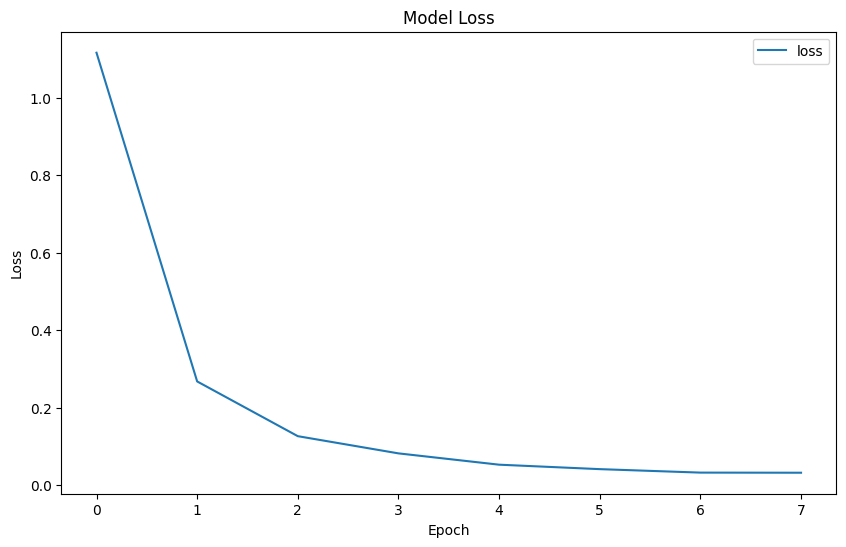

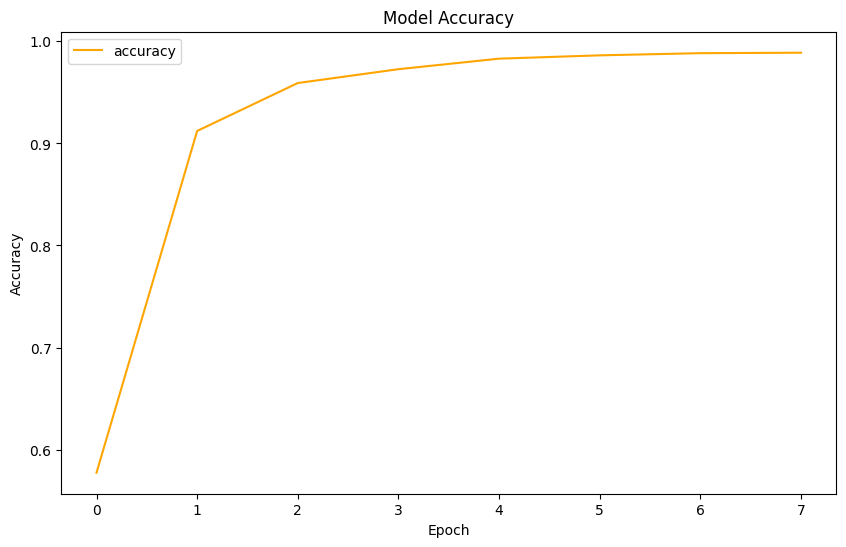

In [11]:
import pandas as pd

df_metrics = pd.DataFrame(history.history)
df_acc = df_metrics[['accuracy']]
df_loss = df_metrics[['loss']]
df_loss.plot(title='Model Loss',figsize=(10,6),xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(10,6),xlabel='Epoch',ylabel='Accuracy',color='orange')

## Manual Testing

In [113]:
text = ["Just watched the sunset, feeling incredibly blessed and thankful for this beautiful life! 🌅✨ #Grateful #Blessed #Sunset"]
text_seq = tokenizer.texts_to_sequences(np.array(text))
text_pad = pad_sequences(text_seq,maxlen=32)
text_pad.shape

(1, 32)

In [110]:
import numpy as np
predictions = model.predict(text_pad)
predicted = np.argmax(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [111]:
if predicted == 0:
    print("Anger")
elif predicted == 1:
    print("Fear")
elif predicted == 2:
    print("Joy")
elif predicted == 3:
    print("Love")
elif predicted == 4:
    print("Sadness")
elif predicted == 5:
    print("Surprise,")

Joy
